In [9]:
# from cProfile import label
# from threading import stack_size
# from turtle import position
import os
import numpy
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn

In [10]:
degree_count = 5
ws_folder = r'D:\PhD_Workspace\MISR_AHI_WS\240113\original'

# lon lat MISR_path MISR_orbit camera_idx MISR_roi_time AHI_roi_time MISR_VZA AHI_VZA MISR_VAA AHI_VAA MISR_SZA AHI_SZA MISR_SAA AHI_SAA
matched_npy_filename = os.path.join(ws_folder, 'MISR_RAY-matched_infos_10km.npy')

In [18]:
def find_nearest_index(array, value):
    array = numpy.asarray(array)
    idx = (numpy.abs(array - value)).argmin()
    return idx


def angle_count(matched_info, info_idx):
    angle_record = numpy.zeros((360*degree_count+1,))
    angle_list = numpy.arange(0, 360+1/degree_count, 1/degree_count)
    angle_list = angle_list * 1.
    for pt_item in matched_info:
        vaa = float(pt_item[info_idx])
        vaa_angle_idx = find_nearest_index(angle_list, vaa)
        angle_record[vaa_angle_idx] = angle_record[vaa_angle_idx] + 1
    return angle_record


def prepare_kde(o_list):
    n_list = numpy.array([])
    for angle_item_idx in range(len(o_list)):
        angle_v_count = o_list[angle_item_idx]
        angle_v = angle_item_idx/degree_count
        angle_ex = numpy.ones((int(angle_v_count),))
        angle_ex_list = angle_ex*angle_v
        n_list = numpy.append(n_list, angle_ex_list)
    return n_list


def kde_mapping(misr_angle_pixel_record, ahi_angle_pixel_record, save_flag=0):
    kde_misr_list = prepare_kde(misr_angle_pixel_record)
    kde_ahi_list = prepare_kde(ahi_angle_pixel_record)

    f, ax1 = plt.subplots()
    f.set_size_inches(12, 10)
    f.set_dpi(100)
    ax1.grid(linestyle='--', linewidth=0.6)
    ax1.set_xlabel('VAA (°)', fontsize=18)

    ax1.hist(kde_misr_list, bins=numpy.arange(0, 360+1/degree_count, 1/degree_count), color='blueviolet', alpha=0.5, label='VAA Count from MISR observations')
    ax1.hist(kde_ahi_list, bins=numpy.arange(0, 360+1/degree_count, 1/degree_count), color='firebrick', alpha=0.5, label='VAA Count from AHI observations')
    ax1.minorticks_on()
    x_major_locator = plt.MultipleLocator(40)
    x_minor_locator = plt.MultipleLocator(5)
    y1_major_locator = plt.MultipleLocator(3000)
    y1_minor_locator = plt.MultipleLocator(600)
    ax1.xaxis.set_major_locator(x_major_locator)
    ax1.xaxis.set_minor_locator(x_minor_locator)
    ax1.yaxis.set_major_locator(y1_major_locator)
    ax1.yaxis.set_minor_locator(y1_minor_locator)
    ax1.tick_params(axis="y", which='minor', length=3, labelsize=10)
    ax1.tick_params(axis="y", which='major', length=5, labelsize=15)
    ax1.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
    sf1 = ScalarFormatter(useMathText=True)
    sf1.set_powerlimits((0,0))
    ax1.yaxis.set_major_formatter(sf1)
    ax1.yaxis.get_offset_text().set(size=15)
    ax1.tick_params(axis="x", which='minor', length=3, labelsize=10)
    ax1.tick_params(axis="x", which='major', length=5, labelsize=15)
    ax1.set_ylabel('Count of Observations', fontsize=18)
    ax1.set_ylim(0, 15000)
    ax1.legend(loc=2, fontsize=14)

    ax2 = ax1.twinx()
    seaborn.distplot(kde_misr_list, bins=numpy.arange(0, 360+1/degree_count, 1/degree_count), ax=ax2, hist=False, kde=True, kde_kws={'linewidth':'1.0', 'color':'blue'}, label='Density of MISR VAA Distribution')
    seaborn.distplot(kde_ahi_list, bins=numpy.arange(0, 360+1/degree_count, 1/degree_count), ax=ax2, hist=False, kde=True, kde_kws={'linewidth':'1.0', 'color':'red'}, label='Density of AHI VAA Distribution')
    y2_major_locator = plt.MultipleLocator(0.004)
    y2_minor_locator = plt.MultipleLocator(0.002)
    ax2.yaxis.set_major_locator(y2_major_locator)
    ax2.yaxis.set_minor_locator(y2_minor_locator)
    ax2.tick_params(axis="y", which='minor', length=3, labelsize=10)
    ax2.tick_params(axis="y", which='major', length=5, labelsize=15)
    ax2.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
    sf2 = ScalarFormatter(useMathText=True)
    sf2.set_powerlimits((0,0))
    ax2.yaxis.set_major_formatter(sf2)
    ax2.yaxis.get_offset_text().set(size=15)
    ax2.set_ylabel('Density of Distribution', fontsize=18)
    ax2.set_ylim(0.0, 0.02)
    ax2.legend(loc=1, fontsize=14)

    plt.xlim(0, 360)
    
    if save_flag:
        plt.savefig(os.path.join(ws_folder, 'MISR_Ray_VAA_distribution.png'), dpi=600)
    # plt.show()


In [12]:
matched_info = numpy.load(matched_npy_filename, allow_pickle=True)

misr_angle_pixel_record = angle_count(matched_info, 9)
ahi_angle_pixel_record = angle_count(matched_info, 10)

C:\Users\Beichen\AppData\Local\Temp\ipykernel_16712\4144546461.py:64: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(kde_misr_list, bins=numpy.arange(0, 360+1/degree_count, 1/degree_count), ax=ax2, hist=False, kde=True, kde_kws={'linewidth':'1.0', 'color':'blue'}, label='Density of MISR VAA Distribution')
C:\Users\Beichen\AppData\Local\Temp\ipykernel_16712\4144546461.py:65: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For 

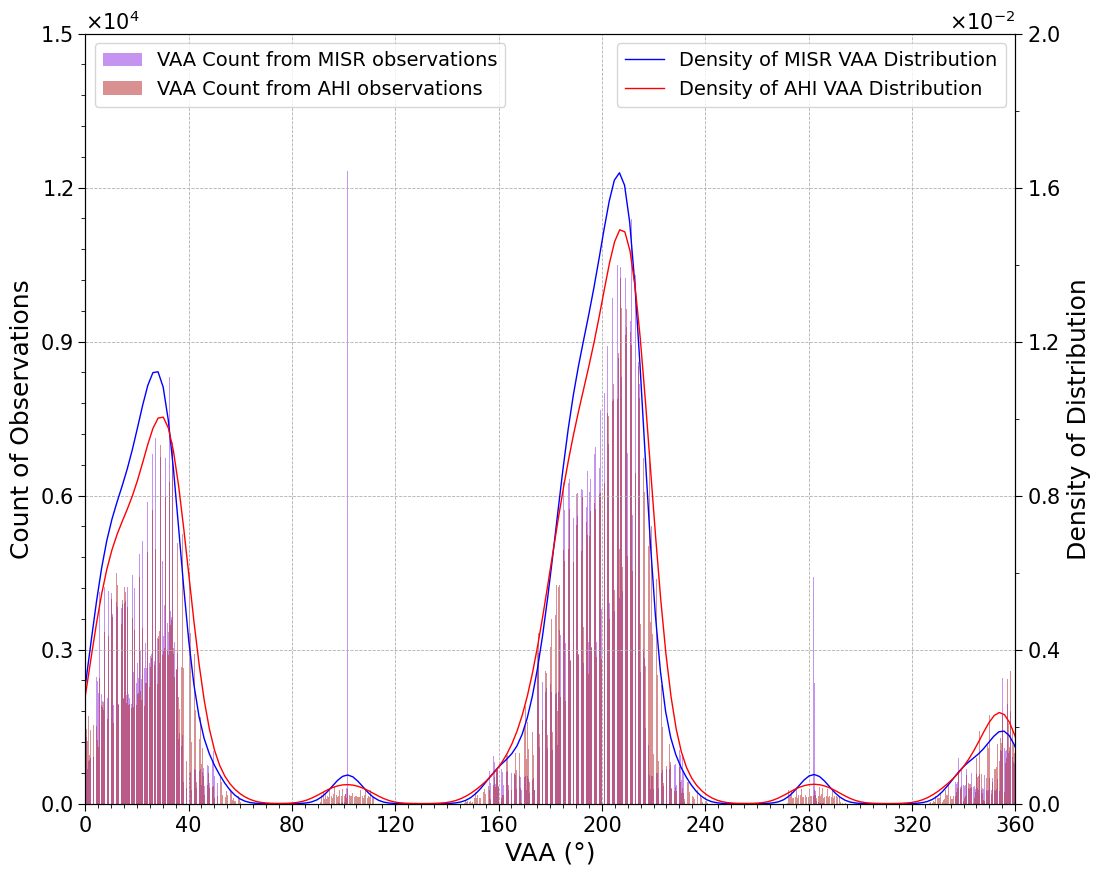

In [19]:
kde_mapping(misr_angle_pixel_record, ahi_angle_pixel_record, 1)